In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anthro.viz
colors = anthro.viz.plotting_style()
plt.rcParams["font.family"] = "Lucida Sans Unicode"

In [3]:
animal_data = pd.read_csv('../../../data/agriculture/FAOSTAT_livestock_population/processed/FAOSTAT_livestock_population.csv')
animal_data.head()

,animal,year,population_Mhd
0,ass,1961,36.958302
1,ass,1962,35.599457
2,ass,1963,35.371329
3,ass,1964,36.118309
4,ass,1965,36.766287


In [10]:
chicken_data = animal_data[animal_data['animal']=='chicken']
cattle_data = animal_data[animal_data['animal']=='cattle']

In [2]:
human_population_data = pd.read_csv('../../../data/anthropocentric/FAOSTAT_world_population/processed/FAOSTAT_total_population.csv')
human_population_data.tail()

,Year,population
64,2014,7295290765
65,2015,7379797139
66,2016,7464022049
67,2017,7547858925
68,2018,7631091040


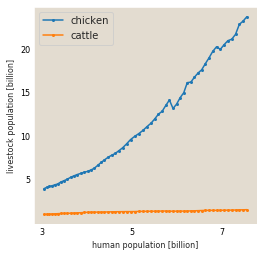

In [26]:
#plot chicken population vs human population
plt.figure(figsize=(4,4))

plt.xlabel('human population [billion]', fontsize=8)
plt.ylabel('livestock population [billion]', fontsize=8)

plt.xticks((3, 5, 7), fontsize=8)
plt.yticks((5, 10, 15, 20), fontsize=8)
plt.plot(human_population_data['population'].values[10:-1]/1e9, chicken_data['population_Mhd'].values/1e3, '-o', label='chicken', markersize=2)
plt.plot(human_population_data['population'].values[10:-1]/1e9, cattle_data['population_Mhd'].values/(1e3), '-o', label='cattle', markersize=2)

plt.legend()
plt.savefig('../../../figures/database_paper/chicken_cattle_timeseries.svg')

In [31]:
anthropomass_data = pd.read_csv('../../../data/anthropocentric/Elhacham2020_anthropomass/processed/anthopogenic_mass_2015_processed.csv')
anthropomass_data.tail()

,Unnamed: 0,Year,concrete_Tt,aggregates_Tt,bricks_Tt,asphalt_Tt,metals_Tt,other_Tt,waste_Tt,total_Tt
111,111,2011,0.335820,0.314733,0.079071,0.055001,0.029322,0.019457,0.234627,1.068030
112,112,2012,0.355099,0.322283,0.080495,0.056080,0.030283,0.019834,0.243201,1.107277
113,113,2013,0.375763,0.329753,0.081841,0.057102,0.031322,0.020234,0.252147,1.148162
114,114,2014,0.396741,0.337347,0.083149,0.058075,0.032345,0.020682,0.261476,1.189815
115,115,2015,0.417198,0.344460,0.084432,0.059013,0.033346,0.021163,0.271154,1.230765


In [39]:
plt.rcParams["font.family"] = "Lucida Sans Unicode"

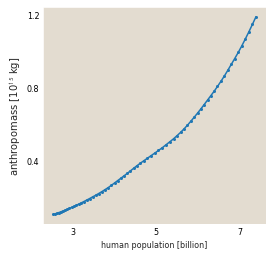

In [40]:
#plot anthropomass vs human population
plt.figure(figsize=(4,4))

plt.xlabel('human population [billion]', fontsize=8)
plt.ylabel('anthropomass [10$^{15}$ kg]')

plt.xticks((3,5,7), fontsize=8)
plt.yticks((0.4,0.8,1.2), fontsize=8)
plt.plot(human_population_data['population'].values[0:-3]/1e9, anthropomass_data['total_Tt'].values[49:-1] ,'-o', markersize=2)

plt.savefig('../../../figures/database_paper/anthropomass_timeseries.svg')

In [37]:
#%% Load the population data 
pop_data = pd.read_csv('../../../data/anthropocentric/FAOSTAT_world_population/processed/FAOSTAT_rural_urban_population.csv')
pop_data['pop_bil'] = pop_data['population'] / 1E9
total_pop = pop_data.groupby(['year'])['pop_bil'].sum().reset_index()
min_pop, max_pop = total_pop['pop_bil'].min(), total_pop['pop_bil'].max()

In [46]:
anthropo = pd.read_csv('../../../data/anthropocentric/Elhacham2020_anthropomass/processed/anthopogenic_mass_2015_processed.csv')
# Tidy
anthropo.rename(columns={'Year':'year'}, inplace=True)
merged = anthropo.merge(total_pop, on='year')
merged.dropna(inplace=True)
merged['bricks_asphalt'] = merged['bricks_Tt'].values + merged['asphalt_Tt'].values
#merged['all_others'] = merged['metals_Tt'].values + merged['waste_Tt'].values + merged['other_Tt']

merged['all_others'] = merged['metals_Tt'].values + merged['other_Tt']

In [49]:
merged.head()

,Unnamed: 0,year,concrete_Tt,aggregates_Tt,bricks_Tt,asphalt_Tt,metals_Tt,other_Tt,waste_Tt,total_Tt,pop_bil,bricks_asphalt,all_others
0,50,1950,0.013634,0.038438,0.017360,0.001994,0.004221,0.006379,0.026745,0.108770,2.536275,0.019354,0.010600
1,51,1951,0.014360,0.039760,0.017477,0.002227,0.004347,0.006446,0.027656,0.112272,2.583817,0.019704,0.010793
2,52,1952,0.015154,0.041185,0.017600,0.002483,0.004477,0.006518,0.028598,0.116014,2.630584,0.020082,0.010995
3,53,1953,0.016047,0.042648,0.017721,0.002754,0.004629,0.006593,0.029570,0.119962,2.677230,0.020475,0.011222
4,54,1954,0.017036,0.044238,0.017843,0.003040,0.004812,0.006673,0.030584,0.124226,2.724302,0.020883,0.011485


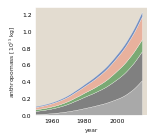

In [54]:
fig, ax =  plt.subplots(1, 1, figsize=(2, 2))

# Format the eaxes
ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
ax.set_xlim([1950, 2018])


ax.set_xlabel('year', fontsize=6)
ax.set_ylabel('anthropomass [10$^{15}$ kg]', fontsize=6)

ax.stackplot(merged['year'].values,
                merged['concrete_Tt'].values,
                merged['aggregates_Tt'].values,
                merged['bricks_asphalt'].values,
                merged['waste_Tt'].values,
                merged['all_others'].values,
                                colors=['darkgrey', 'grey', colors['green'], colors['light_red'], 
                                        colors['blue']],
                                linewidth=0.25)
plt.savefig('../../../figures/database_paper/anthropomass_waste_stack.svg', bbox_inches='tight')



In [49]:
brick_yearly = merged['bricks_asphalt'].values[1:-1] - merged['bricks_asphalt'].values[0:-2]
concrete_yearly = merged['concrete_Tt'].values[1:-1] - merged['concrete_Tt'].values[0:-2]
agg_yearly = merged['aggregates_Tt'].values[1:-1] - merged['aggregates_Tt'].values[0:-2]
others_yearly = merged['all_others'].values[1:-1] - merged['all_others'].values[0:-2]

materials_yearly_dict = {
    'bricks_asphalt' : brick_yearly*100,
    'concrete': concrete_yearly*100,
    'aggregates' : agg_yearly*100,
    'other': others_yearly*100,
    'pop_bil': merged['pop_bil'].values[1:-1]
}
materials_yearly_df = pd.DataFrame(materials_yearly_dict)

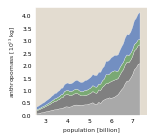

In [50]:
fig, ax =  plt.subplots(1, 1, figsize=(2, 2))

# Format the eaxes
ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
ax.set_xlim([min_pop, max_pop])


ax.set_xlabel('population [billion]', fontsize=6)
ax.set_ylabel('anthropomass [10$^{13}$ kg]', fontsize=6)

ax.stackplot(materials_yearly_df['pop_bil'].values,
                materials_yearly_df['concrete'].values,
                materials_yearly_df['aggregates'].values,
                materials_yearly_df['bricks_asphalt'].values,
                materials_yearly_df['other'].values,
                                colors=['darkgrey', 'grey', colors['green'], 
                                        colors['blue']],
                                linewidth=0.25)
plt.savefig('../../../figures/database_paper/anthropomass_yearly_stack.svg', bbox_inches='tight')


In [25]:
co2_emissions_data = pd.read_csv('../../../data/atmosphere_biogeochemistry/global_carbon_project_CO2/processed/global_carbon_budget_processed.csv')
co2_emissions_data.tail()

,Year,Flux into atmosphere,Sink/source type,Reported value,Units,Value
1915,2014,sink,natural sink,standard deviation,Pg CO2 yr-1,3.78
1916,2015,sink,natural sink,standard deviation,Pg CO2 yr-1,3.78
1917,2016,sink,natural sink,standard deviation,Pg CO2 yr-1,3.78
1918,2017,sink,natural sink,standard deviation,Pg CO2 yr-1,3.78
1919,2018,sink,natural sink,standard deviation,Pg CO2 yr-1,3.78


In [42]:
co2_emissions_data['Sink/source type'].unique()

array(['fossil fuel and industry', 'land-use change emissions',
       'atmospheric growth', 'ocean sink', 'land sink',
       'budget imbalance', 'anthropogenic emissions', 'natural sink'],
      dtype=object)

In [47]:
co2_emissions_data['Units'].unique()

array(['Pg C yr-1', 'Pg CO2 yr-1'], dtype=object)

In [48]:
co2_anthro = co2_emissions_data[co2_emissions_data['Sink/source type']=='anthropogenic emissions']
co2_anthro_mean = co2_anthro[co2_anthro['Reported value']=='mean']
co2_anthro_mean = co2_anthro_mean[co2_anthro_mean['Units']=='Pg CO2 yr-1']

In [37]:
co2_mean = co2_emissions_data[co2_emissions_data['Reported value']=='mean']
co2_mean = co2_mean[co2_mean['Units']=='Pg CO2 yr-1']
co2_mean.rename(columns={'Year': 'year'}, inplace=True)
co2_merged = co2_mean.merge(human_population_data, on='year')
co2_merged.dropna(inplace=True)
co2_merged.head()

,year,Flux into atmosphere,Sink/source type,Reported value,Units,Value,population
0,1959,source,fossil fuel and industry,mean,Pg CO2 yr-1,8.86,2979576185
1,1959,source,land-use change emissions,mean,Pg CO2 yr-1,6.64,2979576185
2,1959,source,atmospheric growth,mean,Pg CO2 yr-1,7.50,2979576185
3,1959,sink,ocean sink,mean,Pg CO2 yr-1,2.78,2979576185
4,1959,sink,land sink,mean,Pg CO2 yr-1,2.07,2979576185


In [42]:
pop_min = co2_merged['population'].values[0]/1e9
pop_max = co2_merged['population'].values[-1]/1e9

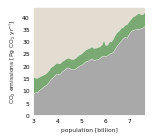

In [44]:
fig, ax =  plt.subplots(1, 1, figsize=(2, 2))

# Format the eaxes
ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
ax.set_xlim([pop_min, pop_max])


ax.set_xlabel('population [billion]', fontsize=6)
ax.set_ylabel('CO$_{2}$ emissions [Pg CO$_{2}$ yr$^{-1}$]', fontsize=6)

ax.stackplot(co2_merged[co2_merged['Sink/source type']=='fossil fuel and industry']['population'].values/1e9, 
                     co2_merged[co2_merged['Sink/source type']=='fossil fuel and industry']['Value'].values,
                     co2_merged[co2_merged['Sink/source type']=='land-use change emissions']['Value'].values, 
                                  colors=['darkgrey', colors['green']],
                                linewidth=0.25)
plt.savefig('../../../figures/database_paper/co2_stack.svg', bbox_inches='tight')

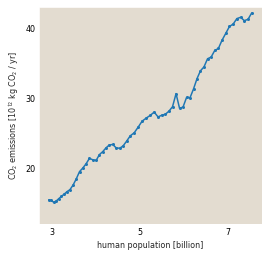

In [60]:
plt.figure(figsize=(4,4))

plt.xlabel('human population [billion]', fontsize=8)
plt.ylabel('CO$_{2}$ emissions [10$^{12}$ kg CO$_{2}$ / yr]', fontsize=8)
plt.ylim((12,43))
plt.xticks((3,5,7), fontsize=8)
plt.yticks((20, 30, 40), fontsize=8)

plt.plot(human_population_data['population'].values[8:-1]/1e9, co2_anthro_mean['Value'].values, '-o', markersize=2)

plt.savefig('../../../figures/database_paper/co2_emissions_timeseries.svg')

In [91]:
params,cov = scipy.optimize.curve_fit(lin_fun, human_population_data['population'].values[8:-1], co2_anthro_mean['Value'].values)
exes = human_population_data['population'].values[8:-1]
ys = lin_fun(human_population_data['population'].values[8:-1], params[0], params[1])

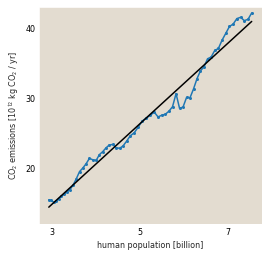

In [93]:
plt.figure(figsize=(4,4))

plt.xlabel('human population [billion]', fontsize=8)
plt.ylabel('CO$_{2}$ emissions [10$^{12}$ kg CO$_{2}$ / yr]', fontsize=8)
plt.ylim((12,43))
plt.xticks((3,5,7), fontsize=8)
plt.yticks((20, 30, 40), fontsize=8)

plt.plot(human_population_data['population'].values[8:-1]/1e9, co2_anthro_mean['Value'].values, '-o', markersize=2)
plt.plot(exes/1e9, ys, color='black')

plt.savefig('../../../figures/database_paper/co2_emissions_timeseries_with_fit.svg')

In [5]:
h20_data = pd.read_csv('../../../data/water/Qin2019_water_use/processed/Qin2019_category_volume_1980-2016.csv')
h20_data.head()

,category,year,volume_km3
0,agriculture,1980,850.8
1,agriculture,1981,869.9
2,agriculture,1982,884.0
3,agriculture,1983,896.1
4,agriculture,1984,908.1


In [64]:
h20_grouped = h20_data.groupby(by='year')
h20_summed = h20_grouped.sum()

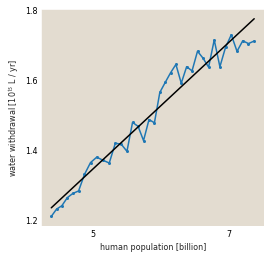

In [90]:
plt.figure(figsize=(4,4))

plt.xlabel('human population [billion]', fontsize=8)
plt.ylabel('water withdrawal [10$^{15}$ L / yr]', fontsize=8)

plt.xticks((3, 5, 7), fontsize=8)
plt.yticks((1.2, 1.4, 1.6, 1.8), fontsize=8)
plt.plot(human_population_data['population'].values[29:-3]/1e9, h20_summed['volume_km3'].values/1e3, '-o', markersize=2)
plt.plot(exes/1e9, ys/1e3, color='black')



plt.savefig('../../../figures/database_paper/water_withdrawal_timeseries_with_fit.svg')

In [8]:
#stacked water withdrawals
human_population_data.rename(columns={'Year': 'year'}, inplace=True)
merged = h20_data.merge(human_population_data, on='year')
merged.dropna(inplace=True)
merged.head()

,category,year,volume_km3,population
0,agriculture,1980,850.8,4458003514
1,domestic_municipal,1980,32.6,4458003514
2,reservoir,1980,321.0,4458003514
3,thermal_power,1980,6.5,4458003514
4,agriculture,1981,869.9,4536996762


In [46]:
pop_min = merged['population'].values[0]/1e9
pop_max = merged['population'].values[-1]/1e9

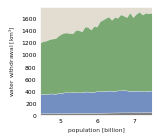

In [48]:
fig, ax =  plt.subplots(1, 1, figsize=(2, 2))

# Format the eaxes
ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
ax.set_xlim([pop_min, pop_max])


ax.set_xlabel('population [billion]', fontsize=6)
ax.set_ylabel('water withdrawal [km$^{3}$]', fontsize=6)

ax.stackplot(merged[merged['category']=='agriculture']['population'].values/1e9, 
                     #merged[merged['category']=='thermal_power']['volume_km3'].values,
                     merged[merged['category']=='domestic_municipal']['volume_km3'].values,
                     merged[merged['category']=='reservoir']['volume_km3'].values,
                     merged[merged['category']=='agriculture']['volume_km3'].values,  
                                  colors=['grey', colors['blue'], 
                                        colors['green']],
                                linewidth=0.25)
plt.savefig('../../../figures/database_paper/water_stack.svg', bbox_inches='tight')

In [34]:
#co2 ppm
co2_atm = pd.read_csv('../../../data/atmosphere_biogeochemistry/mauna_loa_co2_trend/processed/monthly_co2_data_processed.csv')
co2_atm = co2_atm[co2_atm['Reported value']=='monthly mean, filled']
co2_atm['Reported value'].unique()

array(['monthly mean, filled'], dtype=object)

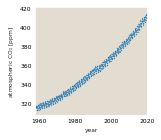

In [35]:
fig, ax =  plt.subplots(1, 1, figsize=(2, 2))

# Format the eaxes
ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
ax.set_xlim([1958, 2020])



ax.set_xlabel('year', fontsize=6)
ax.set_ylabel('atmospheric CO$_{2}$ [ppm]', fontsize=6)


plt.plot(co2_atm['date (decimal)'].values, co2_atm['Concentration (ppm)'].values, '.', markersize=0.5)

plt.savefig('../../../figures/database_paper/atmospheric_CO2.svg', bbox_inches='tight')

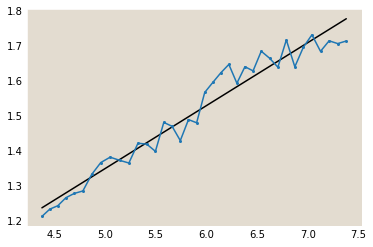

In [87]:
exes = human_population_data['population'].values[29:-3]
ys = lin_fun(exes, params[0], params[1])

plt.figure()
plt.plot(exes/1e9, ys/1e3, color='black')
plt.plot(human_population_data['population'].values[29:-3]/1e9, h20_summed['volume_km3'].values/1e3, '-o', markersize=2)



do we have timeseries data for crops? it would be interesting to look at ag water versus crop yield over time

In [2]:
pop_data = pd.read_csv('../../../data/anthropocentric/FAOSTAT_world_population/processed/FAOSTAT_rural_urban_population.csv')
pop_data['pop_bil'] = pop_data['population'] / 1E9
total_pop = pop_data.groupby(['year'])['pop_bil'].sum().reset_index()
min_pop, max_pop = total_pop['pop_bil'].min(), total_pop['pop_bil'].max()

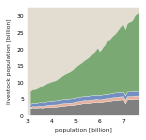

In [5]:
# Load livestock data 
livestock = pd.read_csv('../../../data/agriculture/FAOSTAT_livestock_population/processed/FAOSTAT_livestock_population.csv')
livestock['category'] = 'other'
livestock.loc[livestock['animal']=='cattle', 'category'] = 'cattle'
livestock.loc[livestock['animal']=='chicken', 'category'] = 'chicken'
livestock.loc[livestock['animal']=='swine', 'category'] = 'swine'

livestock = livestock.groupby(['year', 'category'])['population_Mhd'].sum().reset_index()

# Merge on population
merged = livestock.merge(total_pop, on='year')
merged.dropna(inplace=True)

fig, ax =  plt.subplots(1, 1, figsize=(2, 2))

# Format the eaxes
ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
ax.set_xlim([min_pop, max_pop])
ax.set_xlim([3, max_pop])


ax.set_xlabel('population [billion]', fontsize=6)
ax.set_ylabel('livestock population [billion]', fontsize=6)

ax.stackplot(merged['pop_bil'].unique(), 
                                       merged[merged['category']=='other']['population_Mhd']/1E3,
                                       merged[merged['category']=='swine']['population_Mhd']/1E3, 
                                       merged[merged['category']=='cattle']['population_Mhd']/1E3,
                                       merged[merged['category']=='chicken']['population_Mhd']/1E3, 
                                        colors=['grey', colors['light_red'], colors['blue'], 
                                        colors['green']],
                                linewidth=0.25)
plt.savefig('../../../figures/database_paper/livestock_stack.svg', bbox_inches='tight')



In [19]:
plt.rcParams["font.family"] = "Lucida Sans Unicode"

In [7]:
livestock.tail()

,year,category,population_Mhd
227,2017,swine,970.538517
228,2018,cattle,1489.744504
229,2018,chicken,23707.134000
230,2018,other,5028.775299
231,2018,swine,978.332119


In [8]:
animals_produced = pd.read_csv('../../../data/agriculture/FAOSTAT_livestock_product_produced/processed/FAOSTAT_livestock_and_product.csv')
animals_produced.head()

,Unnamed: 0,category,subcategory,year,mass_produced_Mt,producing_population_Mhd,yield_kg_per_head
0,0,poultry,egg,1961,13.457025,1893.282,7.107777
1,1,poultry,egg,1962,13.789385,1947.569,7.080306
2,2,poultry,egg,1963,13.990711,1945.340,7.191910
3,3,poultry,egg,1964,14.603790,1991.798,7.331963
4,4,poultry,egg,1965,15.017012,2061.013,7.286229


In [9]:
animals_produced_merged = animals_produced.merge(total_pop, on='year')
#merged = livestock.merge(total_pop, on='year')

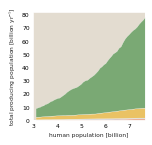

In [22]:
fig, ax =  plt.subplots(1, 1, figsize=(2, 2))

# Format the eaxes
ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
ax.set_xlim([min_pop, max_pop])
ax.set_xlim([3, max_pop])


ax.set_xlabel('human population [billion]', fontsize=6)
ax.set_ylabel('total producing population [billion yr$^{-1}$]', fontsize=6)

ax.stackplot(animals_produced_merged['pop_bil'].unique(), 
                    animals_produced_merged[animals_produced_merged['category']=='swine']['producing_population_Mhd']/1E3, 
                    animals_produced_merged[animals_produced_merged['subcategory']=='beef']['producing_population_Mhd']/1E3,
                    animals_produced_merged[animals_produced_merged['subcategory']=='dairy (milk)']['producing_population_Mhd']/1E3,
                    animals_produced_merged[animals_produced_merged['subcategory']=='egg']['producing_population_Mhd']/1E3,
                    animals_produced_merged[animals_produced_merged['subcategory']=='chicken']['producing_population_Mhd']/1E3,
                                        colors=[colors['light_red'], colors['blue'], 'grey', colors['yellow'], colors['green']],
                                linewidth=0.25)
plt.savefig('../../../figures/database_paper/livestock_producing_stack.svg', bbox_inches='tight')



In [24]:
#anthropomass material inputs
materials = pd.read_excel('../../../data/anthropocentric/Krausmann2017_material_flows/source/Krausmann_2017.xlsx',
                         sheet_name='Primary material inputs', header=5)
materials.head()

,Unnamed: 0,Solidwood,Paper,Plastics,Iron/steel,Aluminum,Copper,Other metals & minerals,Concrete,Asphalt,Bricks,Sand and gravel
0,1900,0.150028,0.040422,0.0,0.052523,0.000017,0.000497,0.001953,0.097900,0.0,0.383504,0.226524
1,1901,0.151280,0.040969,0.0,0.053361,0.000021,0.000527,0.001802,0.111810,0.0,0.389323,0.235914
2,1902,0.153307,0.041355,0.0,0.053692,0.000027,0.000555,0.001813,0.125802,0.0,0.393257,0.213895
3,1903,0.155260,0.041860,0.0,0.054289,0.000037,0.000596,0.001787,0.140511,0.0,0.398718,0.249080
4,1904,0.157006,0.042343,0.0,0.054901,0.000026,0.000659,0.001799,0.154135,0.0,0.402550,0.234941


In [29]:
materials = materials.rename(columns={'Unnamed: 0': 'year'})

In [30]:
materials.head()

,year,Solidwood,Paper,Plastics,Iron/steel,Aluminum,Copper,Other metals & minerals,Concrete,Asphalt,Bricks,Sand and gravel
0,1900,0.150028,0.040422,0.0,0.052523,0.000017,0.000497,0.001953,0.097900,0.0,0.383504,0.226524
1,1901,0.151280,0.040969,0.0,0.053361,0.000021,0.000527,0.001802,0.111810,0.0,0.389323,0.235914
2,1902,0.153307,0.041355,0.0,0.053692,0.000027,0.000555,0.001813,0.125802,0.0,0.393257,0.213895
3,1903,0.155260,0.041860,0.0,0.054289,0.000037,0.000596,0.001787,0.140511,0.0,0.398718,0.249080
4,1904,0.157006,0.042343,0.0,0.054901,0.000026,0.000659,0.001799,0.154135,0.0,0.402550,0.234941


In [31]:
materials_merge = materials.merge(total_pop, on='year')

In [32]:
materials_merge['bricks & asphalt'] = materials_merge['Bricks'].values + materials_merge['Asphalt'].values

In [43]:
materials_merge['other'] = materials_merge['Solidwood'].values + materials_merge['Paper'].values + \
                            materials_merge['Plastics'].values + materials_merge['Iron/steel'].values + \
                            materials_merge['Aluminum'].values + materials_merge['Copper'] + \
                            materials_merge['Other metals & minerals'].values

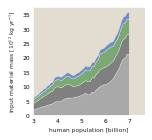

In [45]:
fig, ax =  plt.subplots(1, 1, figsize=(2, 2))

# Format the eaxes
ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
ax.set_xlim([min_pop, max_pop])
ax.set_xlim([3, max_pop])


ax.set_xlabel('human population [billion]', fontsize=6)
ax.set_ylabel('input material mass [10$^{12}$ kg yr$^{-1}$]', fontsize=6)

ax.stackplot(materials_merge['pop_bil'].unique(), 
                    materials_merge['Concrete'].values,
                    materials_merge['Sand and gravel'].values,
                    materials_merge['bricks & asphalt'].values,
                    materials_merge['other'].values,
                    colors=['darkgrey', 'grey', colors['green'], colors['blue']],
                                linewidth=0.25)

plt.savefig('../../../figures/database_paper/anthropomass_input_materials_stack.svg', bbox_inches='tight')